# SALARY PREDICTION (Sanbercode Final Project)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('train.csv', na_values = '?')
df_test = pd.read_csv('test.csv', na_values = '?')
df_all = pd.concat([df_train.drop('Gaji', axis = 1), df_test], ignore_index = True)
df_train

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0,0,35,<= 6 juta
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0,0,40,<= 6 juta
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000,0,45,> 6 juta
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0,0,35,<= 6 juta
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000,0,40,> 6 juta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0,0,40,<= 6 juta
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0,0,40,> 6 juta
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0,0,20,> 6 juta
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0,0,45,<= 6 juta


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     35994 non-null  int64 
 1   Umur                   35994 non-null  int64 
 2   Kelas Pekerja          33931 non-null  object
 3   Berat Akhir            35994 non-null  int64 
 4   Pendidikan             35994 non-null  object
 5   Jmlh Tahun Pendidikan  35994 non-null  int64 
 6   Status Perkawinan      35994 non-null  object
 7   Pekerjaan              33925 non-null  object
 8   Jenis Kelamin          35994 non-null  object
 9   Keuntungan Kapital     35994 non-null  int64 
 10  Kerugian Capital       35994 non-null  int64 
 11  Jam per Minggu         35994 non-null  int64 
 12  Gaji                   35994 non-null  object
dtypes: int64(7), object(6)
memory usage: 3.6+ MB


In [4]:
df_all['Kelas Pekerja'].value_counts()

Wiraswasta                       31662
Pekerja Bebas Bukan Perusahan     3598
Pemerintah Lokal                  2904
Pemerintah Negara                 1853
Pekerja Bebas Perusahaan          1589
Pemerintah Provinsi               1345
Tanpa di Bayar                      19
Tidak Pernah Bekerja                 8
Name: Kelas Pekerja, dtype: int64

In [5]:
df_test.isnull().sum()

id                         0
Umur                       0
Kelas Pekerja            552
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                554
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [6]:
df_all.describe(include = "O")

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin
count,42978,45593,45593,42970,45593
unique,8,16,6,14,2
top,Wiraswasta,SMA,Menikah,Spesialis,Laki2
freq,31662,14756,20892,5729,30474


In [7]:
df_train['Gaji'].value_counts()

<= 6 juta    27364
> 6 juta      8630
Name: Gaji, dtype: int64

In [8]:
df_train['Gaji']

0        <= 6 juta
1        <= 6 juta
2         > 6 juta
3        <= 6 juta
4         > 6 juta
           ...    
35989    <= 6 juta
35990     > 6 juta
35991     > 6 juta
35992    <= 6 juta
35993     > 6 juta
Name: Gaji, Length: 35994, dtype: object

In [9]:
salary_mapping = {"<= 6 juta": 0, "> 6 juta": 1}
df_train['Gaji'] = df_train['Gaji'].replace(salary_mapping)
df_train['Gaji']

0        0
1        0
2        1
3        0
4        1
        ..
35989    0
35990    1
35991    1
35992    0
35993    1
Name: Gaji, Length: 35994, dtype: int64

In [10]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0,0,35,0
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0,0,40,0
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000,0,45,1
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0,0,35,0
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000,0,40,1


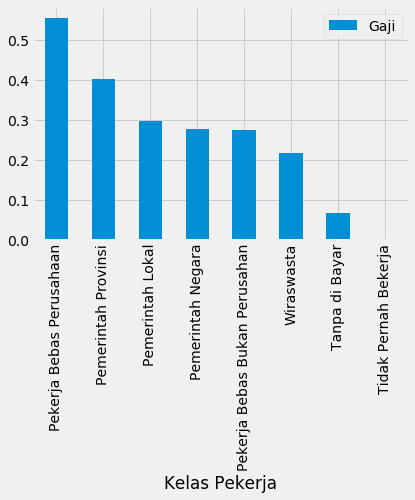

In [11]:
df_train[['Kelas Pekerja','Gaji']].groupby('Kelas Pekerja').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

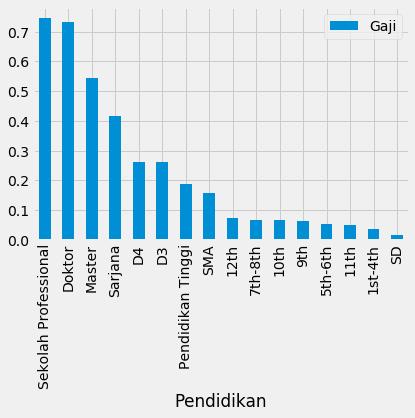

In [12]:
df_train[['Pendidikan','Gaji']].groupby('Pendidikan').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

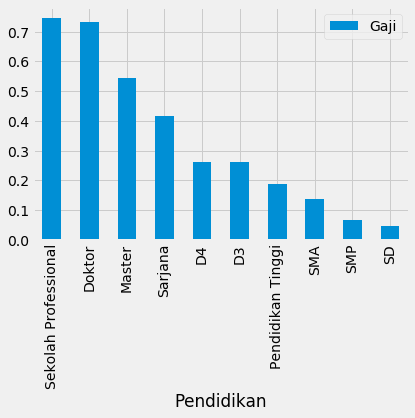

In [13]:
df_train['Pendidikan'] = df_train['Pendidikan'].replace('1st-4th', 'SD')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('5th-6th', 'SD')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('7th-8th', 'SMP')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('9th', 'SMP')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('10th', 'SMA')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('11th', 'SMA')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('12th', 'SMA')
df_train['Pendidikan'] = df_train['Pendidikan'].replace('11th', 'SMA')

df_train[['Pendidikan','Gaji']].groupby('Pendidikan').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

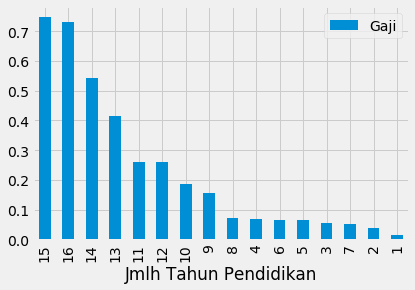

In [14]:
df_train[['Jmlh Tahun Pendidikan','Gaji']].groupby('Jmlh Tahun Pendidikan').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

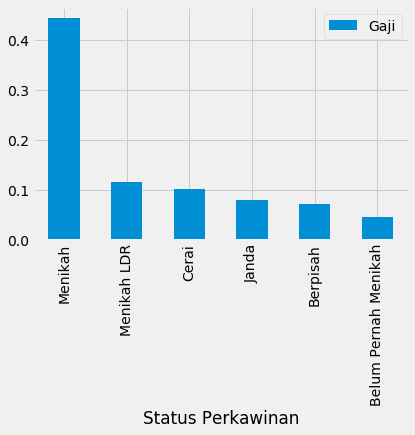

In [15]:
df_train[['Status Perkawinan','Gaji']].groupby('Status Perkawinan').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

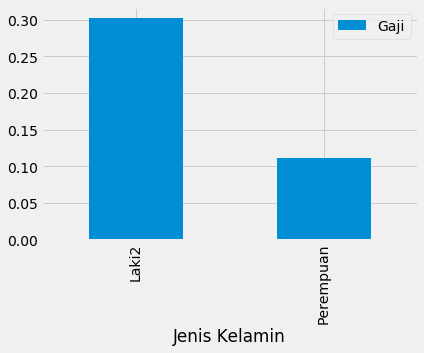

In [16]:
df_train[['Jenis Kelamin','Gaji']].groupby('Jenis Kelamin').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar')

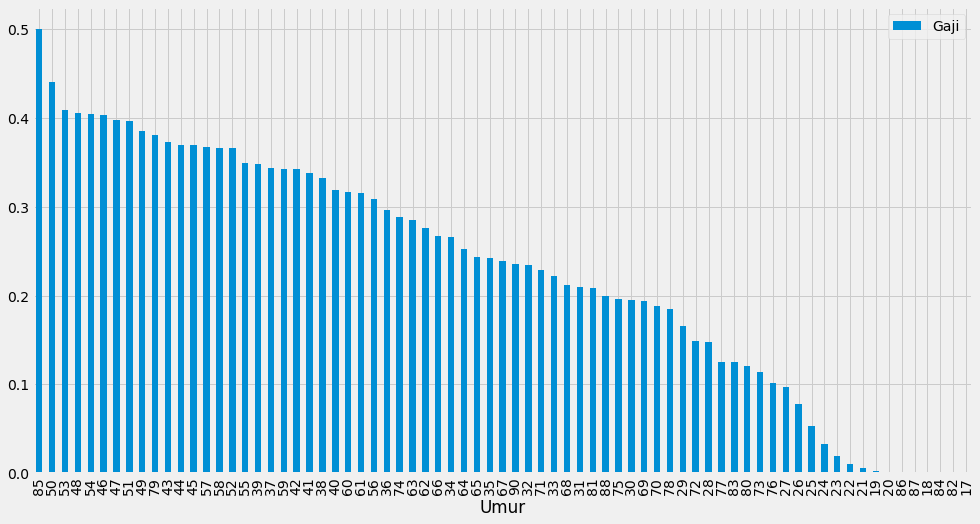

In [17]:
df_train[['Umur','Gaji']].groupby('Umur').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar',figsize = (15,8))

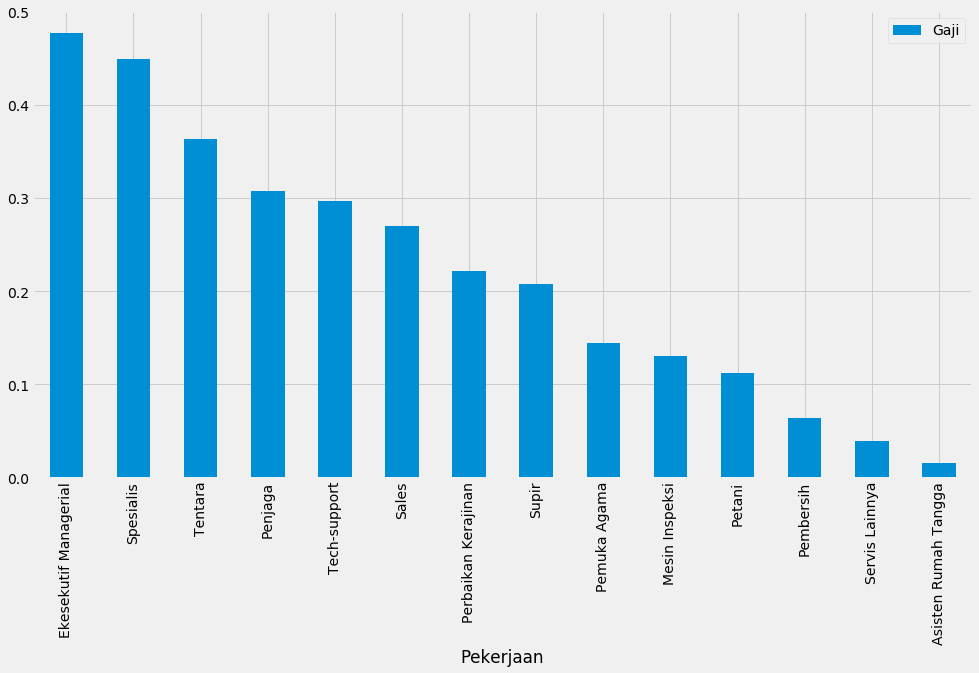

In [18]:
df_train[['Pekerjaan','Gaji']].groupby('Pekerjaan').mean().sort_values(by ='Gaji', ascending = False).plot(kind = 'bar',figsize = (15,8))

In [19]:
# Taking only the features that is important for now
X_train = df_train[['Umur', 'Jmlh Tahun Pendidikan']]

# Taking the labels (Income)
Y_train = df_train['Gaji']

X_test = df_test[['Umur', 'Jmlh Tahun Pendidikan']]
X_test.shape

(9599, 2)

In [20]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.9

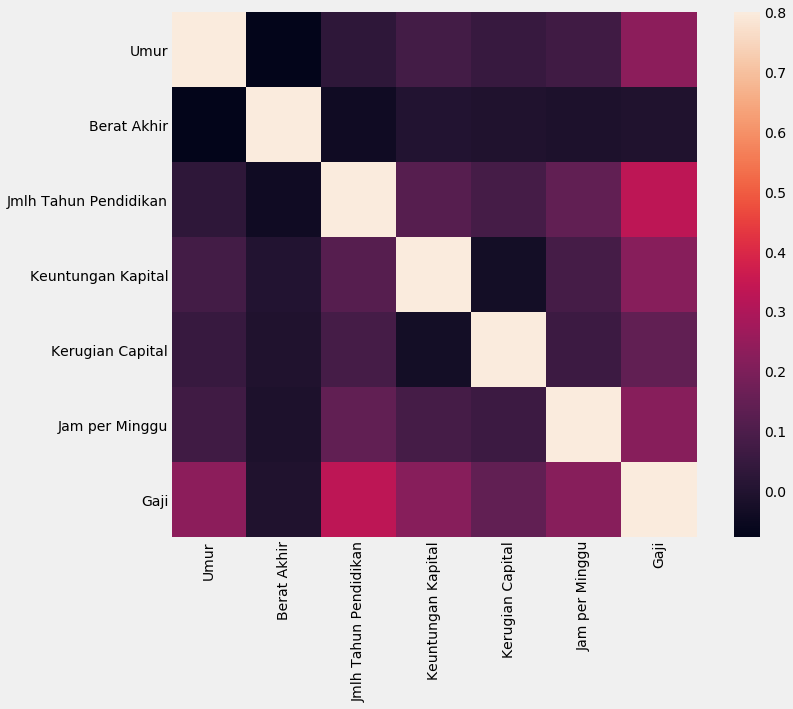

In [21]:
import seaborn as sns
#correlation matrix
corrmat = df_train.drop('id', axis = 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [22]:
# Taking only the features that is important for now
X_train = df_train[['Umur', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital','Jam per Minggu']]

# Taking the labels (Income)
Y_train = df_train['Gaji']

X_test = df_test[['Umur', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital','Jam per Minggu']]

In [23]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
Y_test = classifier.predict(X_test)

acc_svc = round(classifier.score(X_train, Y_train) * 100, 2)
acc_svc

80.1

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_test = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.35

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_test = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.16

In [26]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_test = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.8

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_test_1 = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.94

In [28]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Random Forest', 'Naive Bayes', 'Perceptron'],
    'Score': [acc_svc, acc_knn, acc_random_forest, acc_gaussian, acc_perceptron]})
models.sort_values(by='Score', ascending=False, ignore_index = True)

,Model,Score
0,Random Forest,86.94
1,KNN,82.35
2,Support Vector Machines,80.10
3,Naive Bayes,79.16
4,Perceptron,72.80


In [30]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_dist = {'bootstrap': True,
              'max_depth': 70,
              'max_features': 'auto',
              'min_samples_leaf': 4,
              'min_samples_split': 10,
              'n_estimators': 400}


random_forest_cv = GridSearchCV(random_forest, param_dist, cv=3)
random_forest_cv.fit(X_train, Y_train)
y_test_prob = random_forest.predict_proba(X_test)[:,1]

print("Tuned Decision Tree Parameters: {}".format(random_forest_cv.best_params_))
print("Best score is {}".format(random_forest_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None}
Best score is 0.8124967265489971


In [31]:
submission = pd.DataFrame({
        "Id": df_test["id"],
        "Gaji": Y_test_1
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    
print ('Accuracy:', accuracy_score(Y_test_1, y_pred))
print ('F1 score:', f1_score(Y_te,y_pred))